# Import Necessary Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
df = pd.read_csv('/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv')

# Explore the Data 

In [3]:
df.shape

(19237, 18)

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.tail()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
19236,45813273,470,753,HYUNDAI,Sonata,2012,Sedan,Yes,Hybrid,2.4,186923 km,4.0,Automatic,Front,04-May,Left wheel,White,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

**From the info of the data i found no null value**

In [7]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
df.duplicated().sum()

313

**Then we found duplicated data then i will remove it**

In [10]:
df.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

# Cleaning the Data

<h2>Delete ID column<h2>

In [11]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [12]:
df.drop(['ID','Doors'],axis=1,inplace = True)

<h2>Replace value (-) to 0 after that convert the column Levy to int DataType<h2>

In [13]:
df['Levy'] = df['Levy'].str.replace('-', '0')
df['Levy'] = df['Levy'].astype(float)

<h2>Make Mileage Numrice Column<h2>

In [14]:
df['Mileage'] =df['Mileage'].str.replace('km',"")
df['Mileage'] = df['Mileage'].astype('Int64')

<h2>The Age of Car<h2>

In [15]:
import datetime as dt
dtime = dt.datetime.now()
df['Age']=dtime.year - df['Prod. year']

In [16]:
df.drop(['Prod. year','Cylinders'],axis=1,inplace=True)

<h2>Engine volume Remove Turbo and convert to number<h2>

In [17]:
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')
df['Engine volume'] = df['Engine volume'].astype('float64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  Int64  
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Wheel             19237 non-null  object 
 12  Color             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
 14  Age               19237 non-null  int64  
dtypes: Int64(1), float64(2), int64(3), object(9)
memory usage: 2.2+ MB


# Visualization and Analysis

In [19]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,Automatic,Front,Left wheel,Silver,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.0,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0,300000,Manual,Rear,Left wheel,Silver,5,25
19233,15681,831.0,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600,Tiptronic,Front,Left wheel,Red,8,13
19234,26108,836.0,HYUNDAI,Tucson,Jeep,Yes,Diesel,2.0,116365,Automatic,Front,Left wheel,Grey,4,14
19235,5331,1288.0,CHEVROLET,Captiva,Jeep,Yes,Diesel,2.0,51258,Automatic,Front,Left wheel,Black,4,17


In [20]:
Manufacturer = df['Manufacturer'].value_counts().reset_index().iloc[0:25]
Manufacturer

,Manufacturer,count
0,HYUNDAI,3769
1,TOYOTA,3662
2,MERCEDES-BENZ,2076
3,FORD,1111
4,CHEVROLET,1069
5,BMW,1049
6,LEXUS,982
7,HONDA,977
8,NISSAN,660
9,VOLKSWAGEN,579


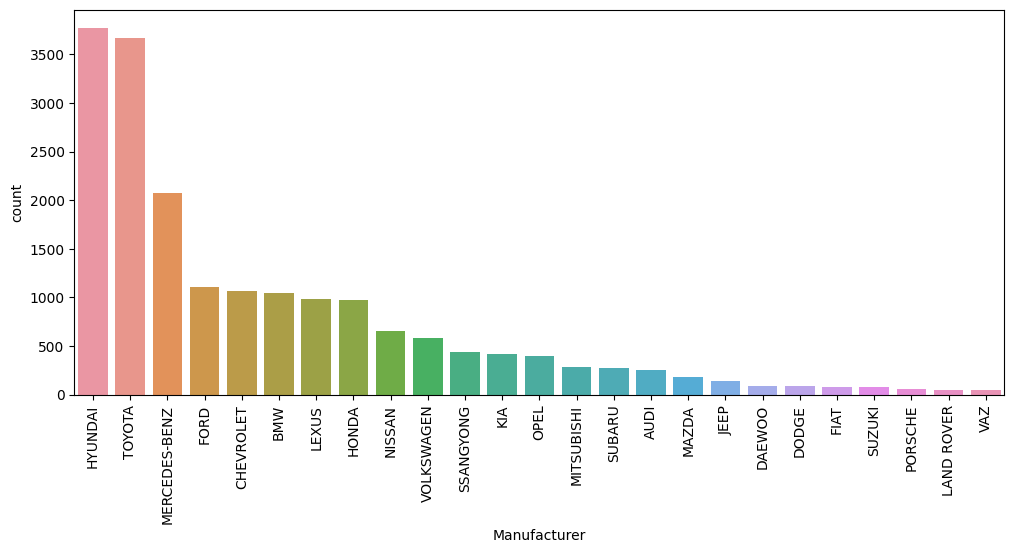

In [21]:
plt.figure(figsize=(12,5))
sns.barplot(x='Manufacturer', y='count', data=Manufacturer)
plt.xticks(rotation=90)
plt.show()

<h2>Calculate average price for top 20 cars<h2>


In [22]:
top_25_manufacturers = Manufacturer['Manufacturer']
top_25_cars_means_prices = [df[df['Manufacturer'] == m]['Price'].mean() for m in top_25_manufacturers]

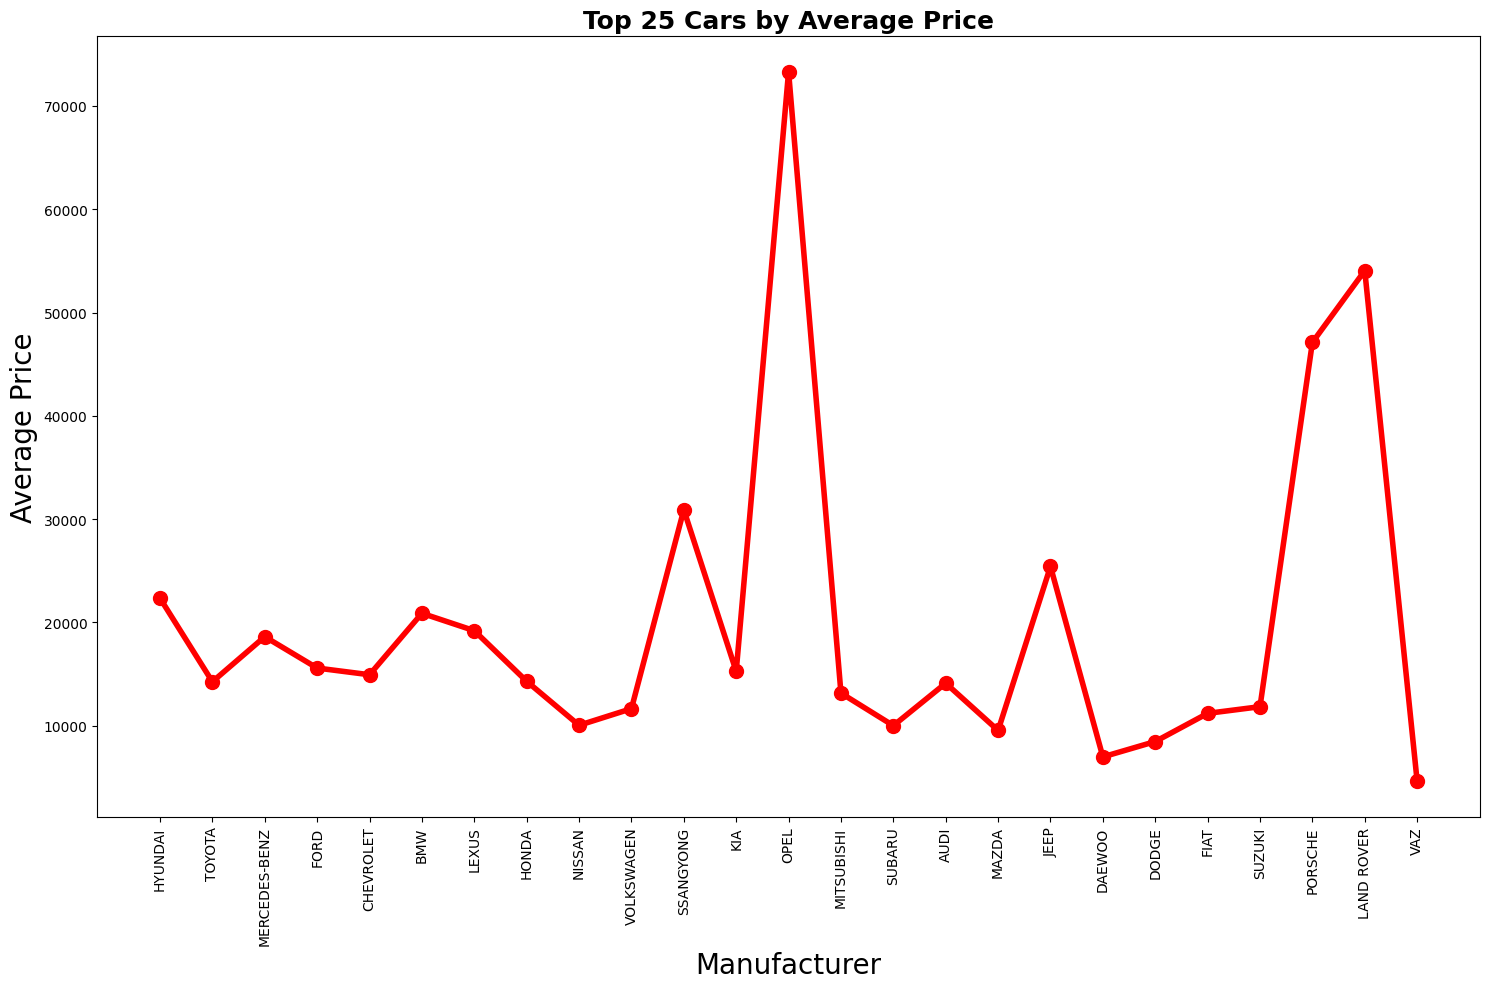

In [23]:
# Plotting
plt.figure(figsize=(15, 10))
plt.plot(top_25_manufacturers, top_25_cars_means_prices, color='r',
         linewidth=4, marker='o', markersize=10)  # Adjust markersize to be visible
plt.title('Top 25 Cars by Average Price', loc='center', fontweight='bold', fontsize=18)
plt.ylabel('Average Price', fontsize=20)
plt.xlabel('Manufacturer', fontsize=20)
plt.xticks(rotation=90)  # Rotate x labels for better readability if needed
plt.tight_layout()
plt.show()

<h2>Model<h2>

In [24]:
Model = df['Model'].value_counts().reset_index().iloc[0:30]
Model

,Model,count
0,Prius,1083
1,Sonata,1079
2,Camry,938
3,Elantra,922
4,E 350,542
5,Santa FE,533
6,FIT,446
7,H1,437
8,Tucson,429
9,X5,353


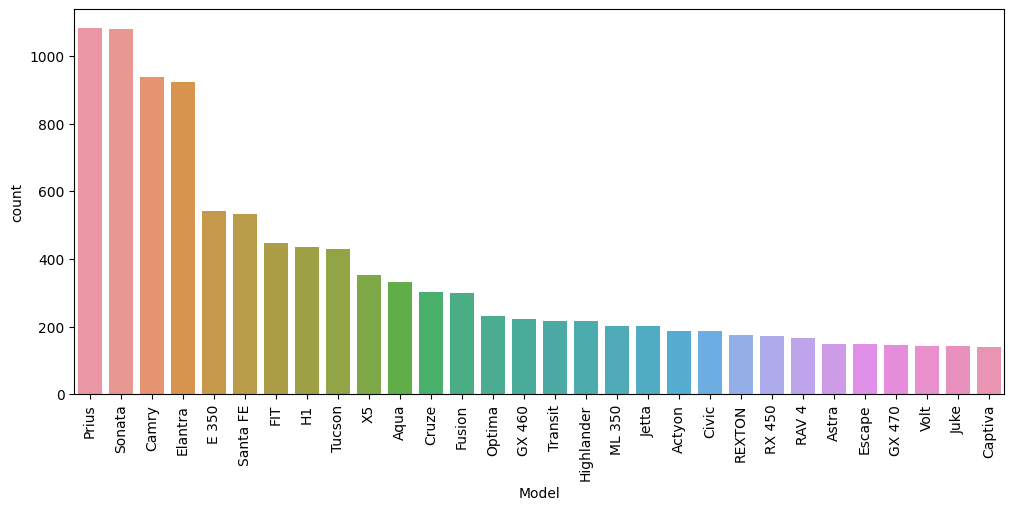

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x='Model', y='count', data=Model)
plt.xticks(rotation=90)
plt.show()

In [26]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,Automatic,Front,Left wheel,Silver,4,10


<h2>Category<h2>

In [27]:
Category = df['Category'].value_counts().reset_index() 
Category

,Category,count
0,Sedan,8736
1,Jeep,5473
2,Hatchback,2847
3,Minivan,647
4,Coupe,532
5,Universal,364
6,Microbus,306
7,Goods wagon,233
8,Pickup,52
9,Cabriolet,36


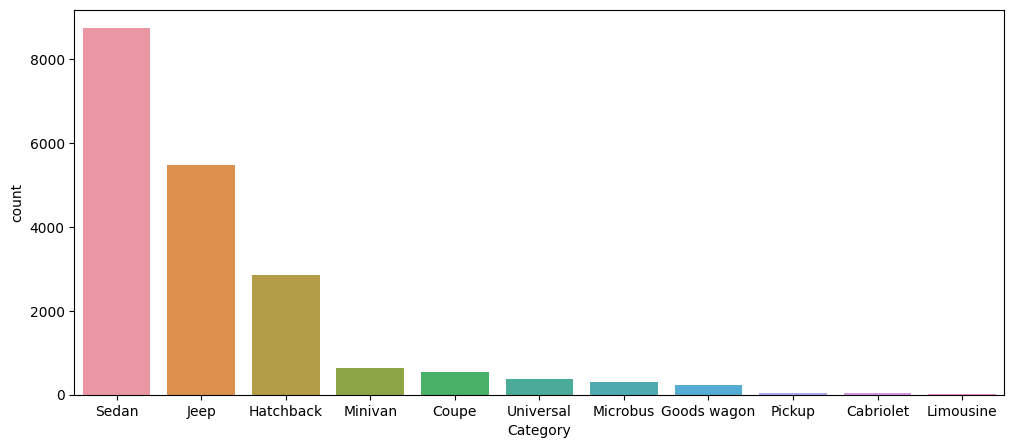

In [28]:
plt.figure(figsize=(12,5))
sns.barplot(x='Category', y='count', data=Category)
# plt.xticks(rotation=90)
plt.show()

In [29]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,Variator,Front,Right-hand drive,Black,2,18
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,Automatic,4x4,Left wheel,White,0,13
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,Automatic,Front,Left wheel,Silver,4,10


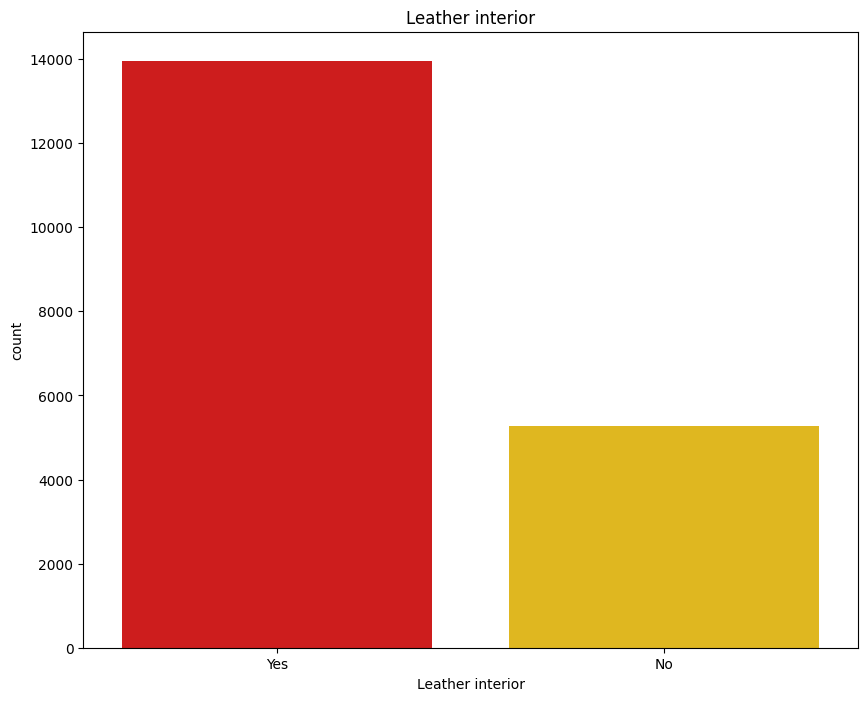

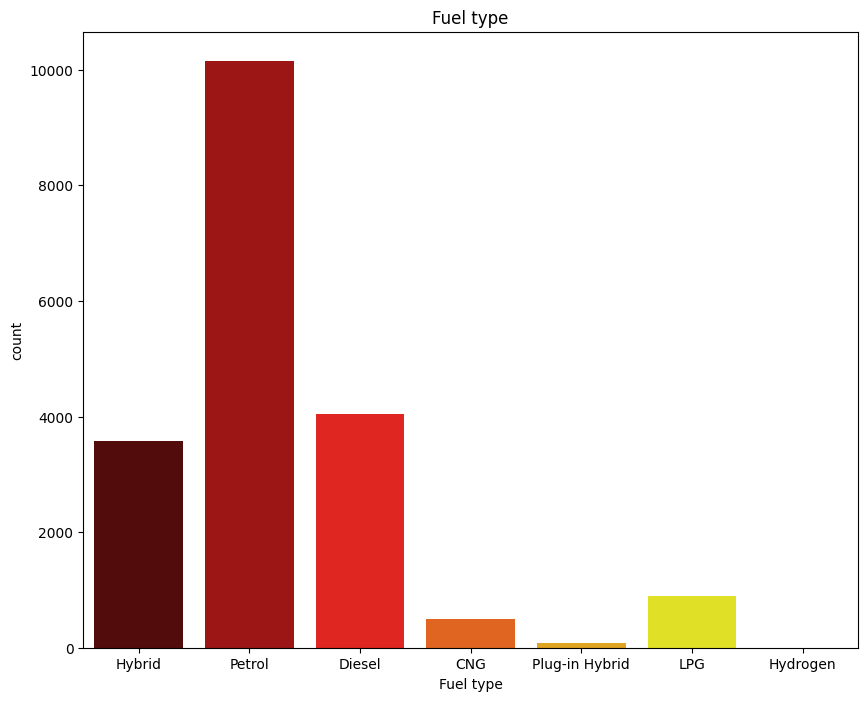

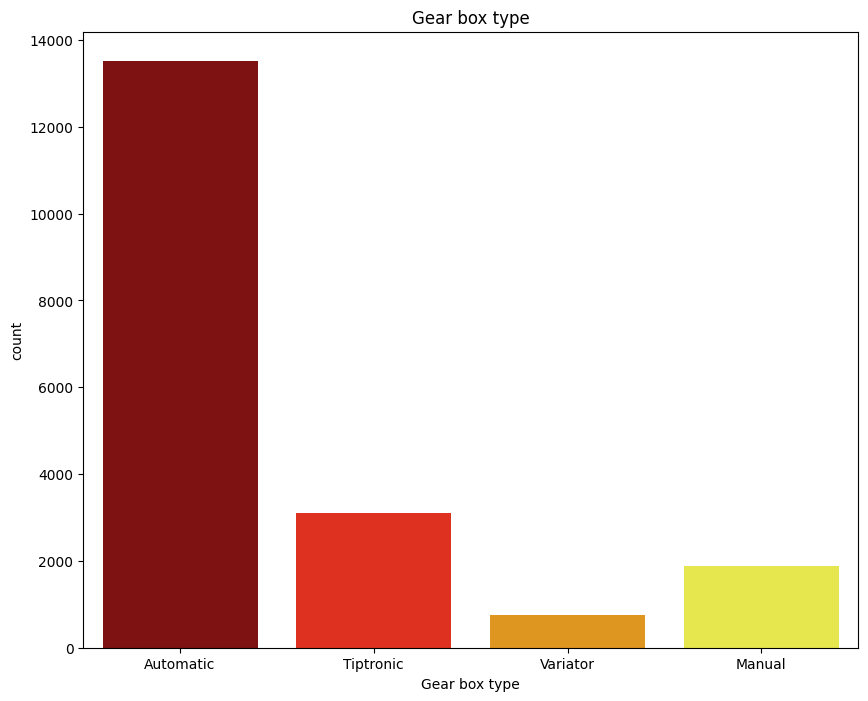

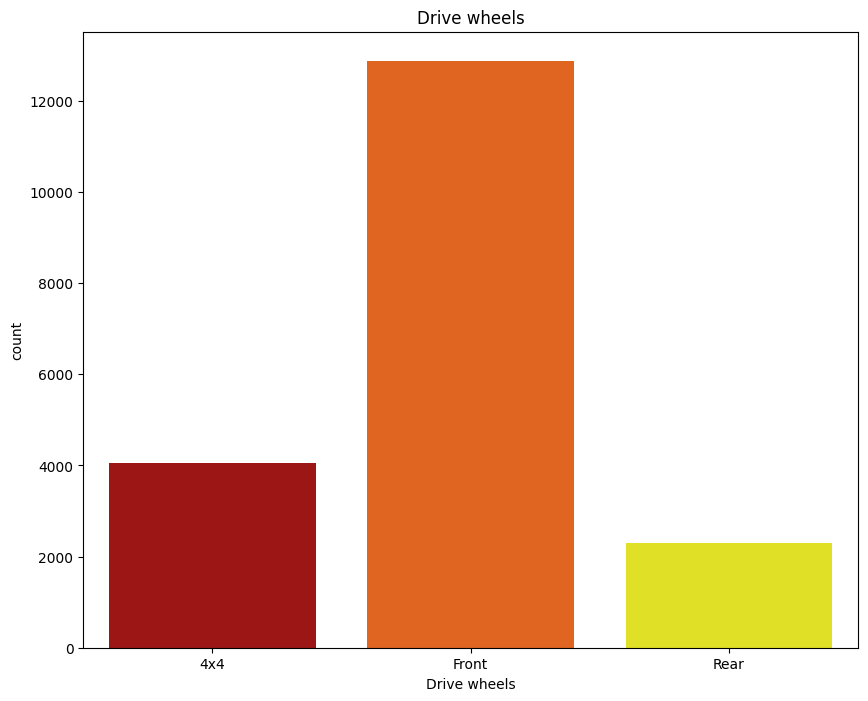

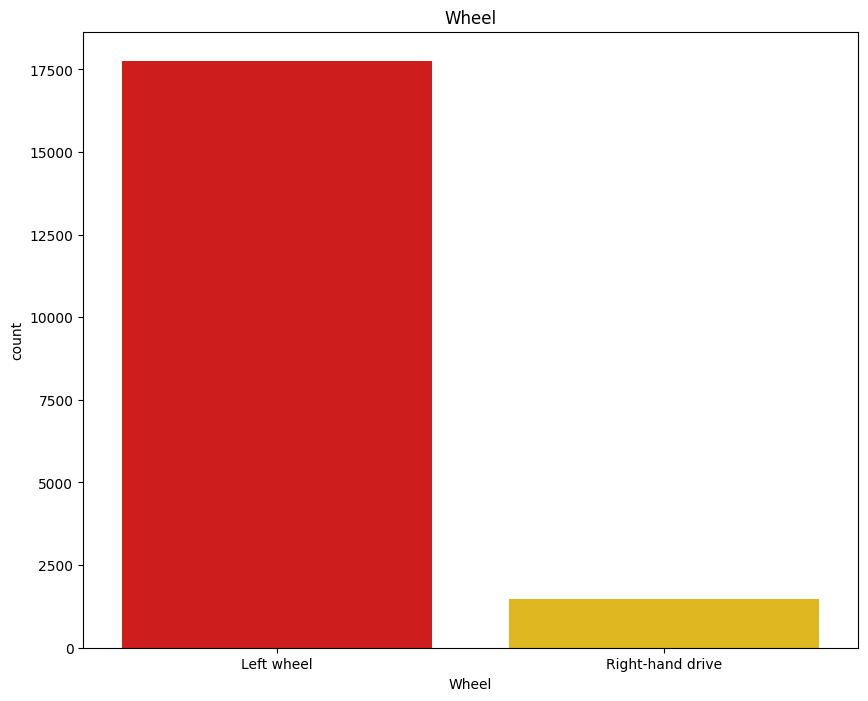

In [30]:
columns =['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in columns:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=col,palette='hot')
    plt.title(col)
    plt.show()

<h2>show the data how each columns affect to data<h2>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  float64
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  object 
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  Int64  
 9   Gear box type     19237 non-null  object 
 10  Drive wheels      19237 non-null  object 
 11  Wheel             19237 non-null  object 
 12  Color             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
 14  Age               19237 non-null  int64  
dtypes: Int64(1), float64(2), int64(3), object(9)
memory usage: 2.2+ MB


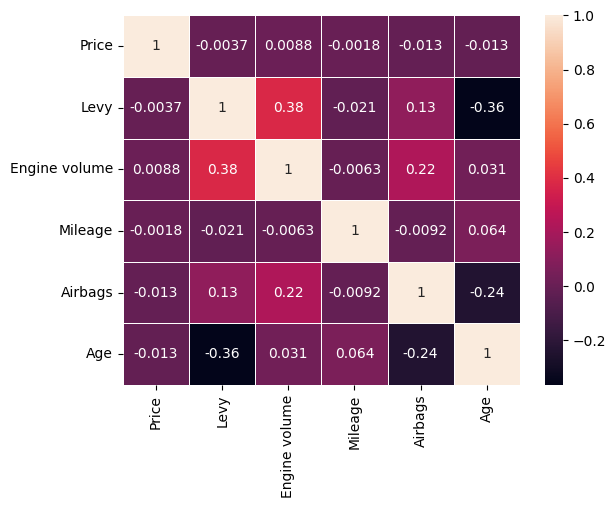

In [31]:
numrcolumns = df.select_dtypes(exclude=object).corr()
sns.heatmap(numrcolumns, annot= True, linewidths= 0.5)
df.info()

<h2>Handle The Outlier<h2>

In [32]:
histogram_labels = ['Price',
                    'Levy', 
                    'Engine volume', 
                    'Mileage', 
                    'Airbags', 
                    'Age', 
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

<h2>let is handle the Outlier<h2>

In [33]:
numeric_data = df.select_dtypes(exclude=object)
numeric_data

,Price,Levy,Engine volume,Mileage,Airbags,Age
0,13328,1399.0,3.5,186005,12,14
1,16621,1018.0,3.0,192000,8,13
2,8467,0.0,1.3,200000,2,18
3,3607,862.0,2.5,168966,0,13
4,11726,446.0,1.3,91901,4,10
...,...,...,...,...,...,...
19232,8467,0.0,2.0,300000,5,25
19233,15681,831.0,2.4,161600,8,13
19234,26108,836.0,2.0,116365,4,14
19235,5331,1288.0,2.0,51258,4,17


In [34]:
for col in numeric_data:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_data[col].quantile(0.25)
    Q3 = numeric_data[col].quantile(0.75)
    
    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = ((numeric_data[col] < lower_bound) | (numeric_data[col] > upper_bound)).sum()
    
    # Calculate total number of data points
    total_points = numeric_data[col].shape[0]
    
    # Print the number and percentage of outliers
    print(f"Total Outliers in {col}: {outliers} -- {round(100 * (outliers / total_points), 2)}%")

Total Outliers in Price: 1073 -- 5.58%
Total Outliers in Levy: 161 -- 0.84%
Total Outliers in Engine volume: 1381 -- 7.18%
Total Outliers in Mileage: 640 -- 3.33%
Total Outliers in Airbags: 0 -- 0.0%
Total Outliers in Age: 982 -- 5.1%


In [35]:
if outliers>0:
    df = df.loc[(df[col]<=upper_bound) & (df[col]>=lower_bound) ]

In [36]:
histogram_labels = ['Price',
                    'Levy', 
                    'Engine volume', 
                    'Mileage', 
                    'Airbags', 
                    'Age', 
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

# PreProcessing

<h3>Convert all object columns to numerical by labelencoder<h3>

In [37]:
objectcolumns = df.select_dtypes('object').columns.to_list()
objectcolumns

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color']

In [38]:
labe = LabelEncoder()
for objcol in objectcolumns:
    df[objcol] = labe.fit_transform(df[objcol])

In [39]:
df

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,32,1136,4,1,2,3.5,186005,0,0,0,12,12,14
1,16621,1018.0,8,586,4,0,5,3.0,192000,2,0,0,1,8,13
2,8467,0.0,21,610,3,0,5,1.3,200000,3,1,1,1,2,18
3,3607,862.0,16,589,4,1,2,2.5,168966,0,0,0,14,0,13
4,11726,446.0,21,610,3,1,5,1.3,91901,0,1,0,12,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055.0,36,530,9,1,1,3.5,107800,0,2,0,7,12,11
19233,15681,831.0,23,1213,9,1,5,2.4,161600,2,1,0,11,8,13
19234,26108,836.0,23,1312,4,1,1,2.0,116365,0,1,0,7,4,14
19235,5331,1288.0,8,396,4,1,1,2.0,51258,0,1,0,1,4,17


# Split the Data

In [40]:
X = df.drop('Price',axis=1)
y = df['Price']

In [41]:
X

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,1399.0,32,1136,4,1,2,3.5,186005,0,0,0,12,12,14
1,1018.0,8,586,4,0,5,3.0,192000,2,0,0,1,8,13
2,0.0,21,610,3,0,5,1.3,200000,3,1,1,1,2,18
3,862.0,16,589,4,1,2,2.5,168966,0,0,0,14,0,13
4,446.0,21,610,3,1,5,1.3,91901,0,1,0,12,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,1055.0,36,530,9,1,1,3.5,107800,0,2,0,7,12,11
19233,831.0,23,1213,9,1,5,2.4,161600,2,1,0,11,8,13
19234,836.0,23,1312,4,1,1,2.0,116365,0,1,0,7,4,14
19235,1288.0,8,396,4,1,1,2.0,51258,0,1,0,1,4,17


In [42]:
y

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19231     5802
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 18255, dtype: int64

<h2>Train Test Split<h2>

In [43]:
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=43)

In [44]:
X_train

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
6528,333.0,16,665,9,1,2,2.0,0,0,1,0,12,0,10
16508,394.0,55,375,9,1,2,2.5,179381,0,1,0,1,12,10
12823,586.0,23,561,9,0,5,1.8,156800,0,1,0,1,6,12
310,0.0,36,335,1,1,5,3.2,255000,2,2,0,12,4,24
7355,1646.0,32,722,4,1,5,4.6,129931,0,0,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,707.0,51,1120,4,1,1,2.0,101285,0,1,0,14,4,13
17195,640.0,16,665,9,1,2,2.0,135000,3,1,0,14,12,11
5596,1017.0,23,1190,4,1,1,2.0,72040,0,1,0,2,4,7
8427,0.0,16,1296,6,0,1,2.2,1500000,1,1,0,14,8,18


In [45]:
x_test

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
14421,707.0,23,1213,9,1,5,2.0,151727,0,1,0,1,4,13
2762,777.0,55,392,9,1,5,2.5,140000,0,1,0,7,8,10
16127,394.0,55,375,9,1,2,2.5,130478,0,1,0,14,12,10
14550,0.0,21,794,3,0,2,1.3,113000,2,1,0,1,8,14
12570,0.0,40,1285,9,1,5,1.5,150000,0,1,1,1,5,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,0.0,40,1285,3,1,5,1.8,126000,3,1,1,12,2,16
6603,574.0,21,794,3,1,2,1.3,184250,0,1,0,7,0,14
14893,779.0,55,375,9,1,2,2.5,225510,0,1,0,14,12,11
9143,650.0,8,245,3,1,5,1.4,94793,0,1,0,1,4,8


In [46]:
Y_train

6528      1019
16508    11133
12823    12858
310       7840
7355       784
         ...  
5833     29094
17195    25402
5596     42717
8427     13172
14924    10036
Name: Price, Length: 13691, dtype: int64

# Build Model

<h2>Delcare function becouse i will use 5 models<h2>

In [47]:
algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestClassifier','XGBRegressor','CatBoostRegressor','SVR']
R2=[]
RMSE = []

In [48]:
def model(model):
    model.fit(X_train,Y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of Model is :{score}')

In [49]:
model1  = LinearRegression()
model2  = DecisionTreeRegressor(max_depth = 5)
model3  = RandomForestRegressor(n_estimators=100, max_features= 7)
model4 = XGBRegressor(max_depth = 7, n_estimators=500, learning_rate =.05)
model5  = CatBoostRegressor(learning_rate =.07, max_depth =7, verbose=0)
model6 = SVR()

In [50]:
model(model1)
model(model2)
model(model3)
model(model4)
model(model5)
model(model6)

The Score of Model is :0.21000660797807835
The Score of Model is :0.3415544756002641
The Score of Model is :0.7082016006591914
The Score of Model is :0.7163386330349542
The Score of Model is :0.6993924357703036
The Score of Model is :-0.04444285564039219


In [51]:
df = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
df

,Algorithm,R2_score,RMSE
0,LinearRegression,0.210007,16168.248133
1,DecisionTreeClassifier,0.341554,14760.843012
2,RandomForestClassifier,0.708202,9826.360407
3,XGBRegressor,0.716339,9688.383739
4,CatBoostRegressor,0.699392,9973.582597
5,SVR,-0.044443,18590.607343


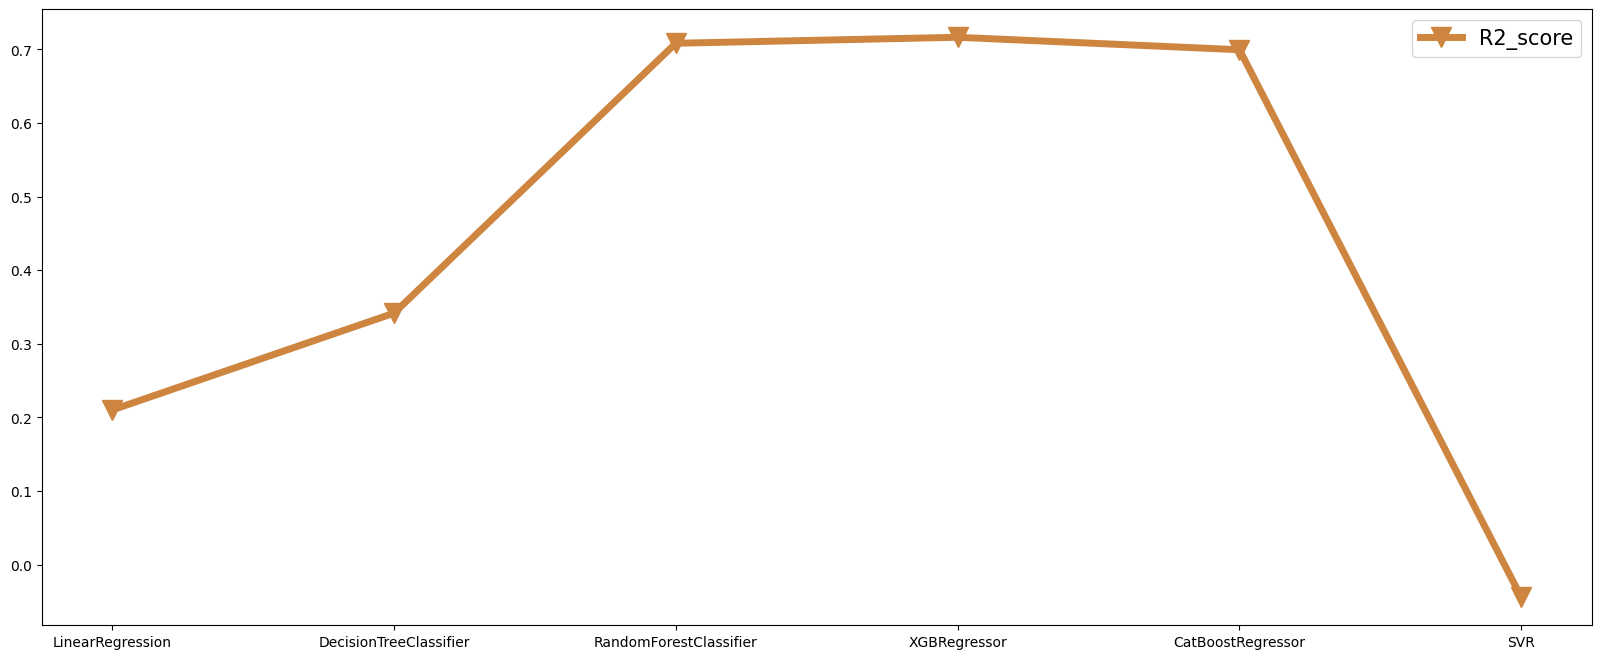

In [52]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.R2_score ,label='R2_score',lw=5,color='peru',marker='v',markersize = 15)
plt.legend(fontsize=15)
plt.show()

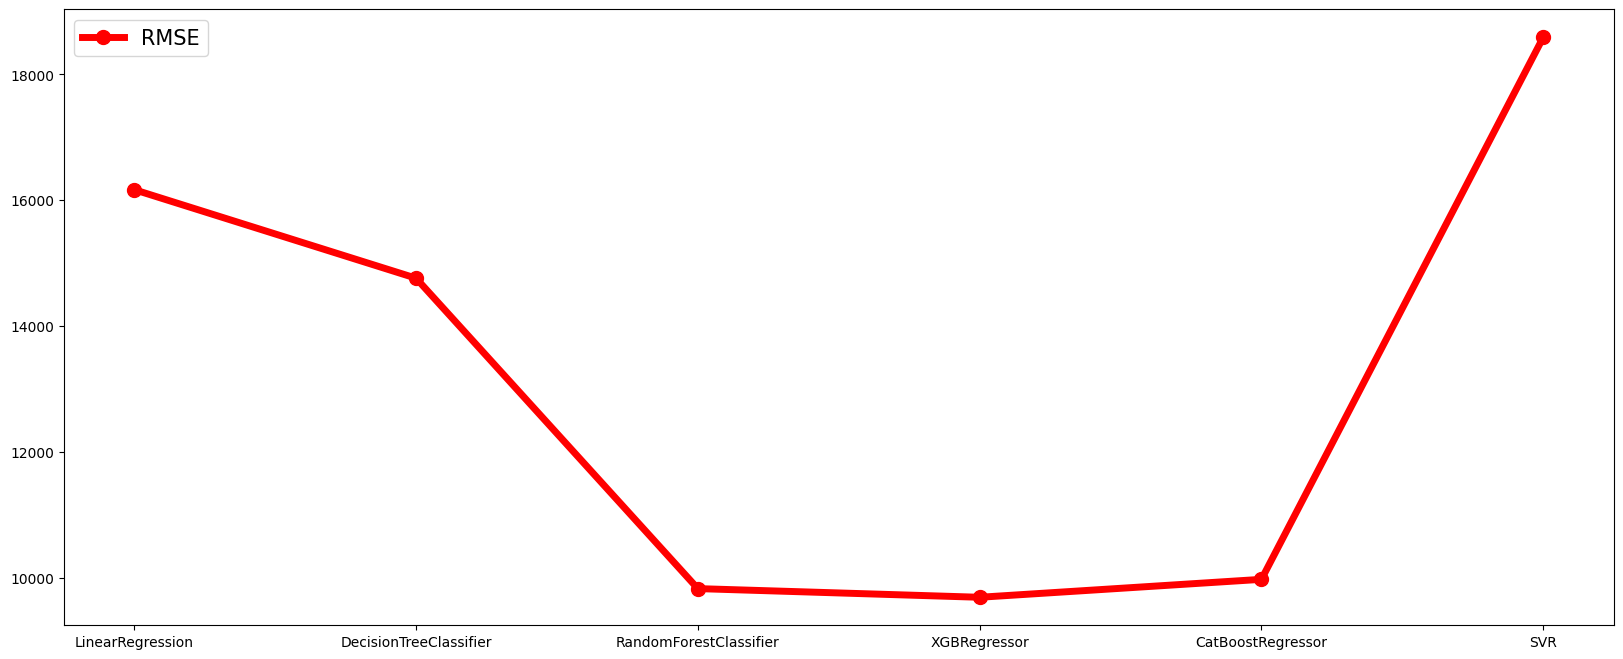

In [53]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.RMSE ,label='RMSE',lw=5,color='r',marker='o',markersize = 10)
plt.legend(fontsize=15)
plt.show()

# Save the Model

In [54]:
import pickle 

In [55]:
filename = 'CarPredict1.sav'

In [56]:
pickle.dump(model4,open(filename,'wb'))